# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:
[ML0919, Задание 2] Фамилия Имя.<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [929]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$w_{new} = w_{old} - \alpha\frac{1}{n}\sum_{j = 1}^{n}\nabla_{w_{old}}L(x_{j},y_{j},w_{old}) = w_{old} - \alpha\frac{1}{n}\sum_{j = 1}^{n}2((x_{j},w_{old}) - y_{j})x_{j} - \alpha\frac{2w_{old}}{C}$$
По сути $\nabla_{w_{old}}L(x_{j},y_{j},w_{old})$ - среднее значение ошибки на обучении.


Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$ w_{new} = w_{old} - \alpha\frac{1}{n}\sum_{j = 1}^{n} (\sigma(x_j,w_{old}) - y_j)x_j - \alpha\frac{2w_{old}}{C}$$
По сути $\nabla_{w_{old}}L(x_{j},y_{j},w_{old})$ - среднее значение ошибки вероятности определения 1 класса. Присутствует $\sigma$, которая играет роль "вероятности".

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

Достаточное условие минимума: $H(L(x,y,w_{extr})) > 0 \Rightarrow$. $H(L(x,y,w_{extr})) = 2X^{T}Xw$, тогда проверяем на положительную определенность: $\forall w \in W :(2X^{T}{X}w,w) = 2(X^{T}{X}w,w) = (2Xw,Xw) > 0$ (используем свойство сопряженного линейного оператора)

При использование L2 регуляризации в $L(x_j,y_j,w_{old})$ появляется слагаемое $R(w) =  |w|^{2} \Rightarrow$ Представляем $\frac{|w|^{2}}{C}$ в виде $\frac{w^{T}w}{C}$ и получаем после подсчета градиента: $-2X^{T}Y + 2X^{T}{X}w + \frac{2w}{C} = 0 \Leftrightarrow w = (X^{T}X + \frac{wE}{C})^{-1}X^{T}Y$

При линейно зависимых признаках определитель матрицы $(X^{T}X)^{-1}$ может уходить в ноль, L2 регуляризация функции потерь добавляет слагаемое $\frac{wE}{C}$, позволяющее этого избежать.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

Считаем градиент(производную) мат. ожидания по $a(x_i)$:$\nabla_{a(x_i)}{E(L | x_i)} =  -\frac{p(y_i = 1|x_i)}{a(x_i)} + \frac{p(y_i = 0|x_i)}{1 - a(x_i)} \Rightarrow \frac{1}{1 - a(x_i)} - p(y_i = 1|x_i)(\frac{1}{1 - a(x_i)} + \frac{1}{a(x_i)}) = 0  \Leftrightarrow  \frac{1}{1 - a(x_i)} = \frac{p(y_i = 1|x_i)}{(1-a(x_i))a(x_i)} \Leftrightarrow a(x_i) = p(y_i = 1|x_i)$

$\nabla_{a(x_i) = p(y_i = 1|x_i)}^{2}{E(L | x_i)} = \frac{p(y_i = 1|x_i)}{p^{2}(y_i = 1|x_i)} + \frac{p(y_i = 0|x_i)}{(1 - p(y_i = 1|x_i))^{2}} > 0 \Rightarrow$ нашли минимум.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

Использовать нужно. Удобно использовать геомертрическую интерпетацию. Если графически представить объекты выборки(то есть отложить по осям признаки), то свободный член, входящий в регуляризацию, будет отвечать за **"движение"** гиперплоскости без её поворота(за поворот отвечают соответсвующие $w_i, i \neq 0$).

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [6]:
def fib(max_iter=10):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [7]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 4 fib values: 3
Fib num: 5 fib values: 5
Fib num: 6 fib values: 8
Fib num: 7 fib values: 13
Fib num: 8 fib values: 21
Fib num: 9 fib values: 34


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [8]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 4 fib values: 3
Fib num: 5 fib values: 5
Fib num: 6 fib values: 8
Fib num: 7 fib values: 13
Fib num: 8 fib values: 21
Fib num: 9 fib values: 34
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 4 fib values: 3
Fib num: 5 fib values: 5
Fib num: 6 fib values: 8
Fib num: 7 fib values: 13
Fib num: 8 fib values: 21
Fib num: 9 fib values: 34
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 4 fib values: 3
Fib num: 5 fib values: 5
Fib num: 6 fib values: 8
Fib num: 7 fib values: 13
Fib num: 8 fib values: 21
Fib num: 9 fib values: 34


А вот так уже нельзя.

In [9]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 4 fib values: 3
Fib num: 5 fib values: 5
Fib num: 6 fib values: 8
Fib num: 7 fib values: 13
Fib num: 8 fib values: 21
Fib num: 9 fib values: 34


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [833]:
from sklearn.datasets import load_iris
from sklearn import utils 

def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    X_batch = ""
    y_batch = ""
    for i in range(y.shape[0] // batch_size):
        if shuffle:
            X_shuffled,y_shuffled = utils.shuffle(X,y,random_state = np.random)
            X_batch = X_shuffled[0:batch_size,::]
            y_batch = y_shuffled[0:batch_size]
        else:
            X_batch = X[i * batch_size:(i+1) * batch_size,::]
            y_batch = y[i * batch_size:(i+1) * batch_size]
        yield (X_batch, y_batch)
#test

#data = load_iris()
#X,y = data.data,data.target
# Теперь можно сделать генератор по данным ()
#for batch in my_batch_generator:
#   print(batch)

In [899]:
#%%pycodestyle

from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    ## Your code Here
    sigm_value_x = 1/(1 + np.exp(-x))
    return sigm_value_x

#using L2 regularization
class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg',batch_size = 1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        
    def setAlpha(self,alpha):
        self.alpha = alpha
        
    def setC(self,C):
        self.C = C
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        algResult = np.dot(X_batch,self.weights)
        if self.model_type == 'lin_reg':
            loss = np.mean((y_batch - algResult) ** 2) + np.linalg.norm(self.weights[1:])/self.C
        else:
            proba = sigmoid(algResult)
            loss = -np.mean((y_batch*np.log2(proba)) + (1 - y_batch)*np.log2(1 - proba)) + np.linalg.norm(self.weights[1:])/self.C
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        L2 = 2*self.weights/self.C
        algResult = np.dot(X_batch,self.weights)
        if self.model_type == 'lin_reg':
            loss_grad = 2 * np.mean(X_batch * (algResult - y_batch).reshape(-1,1),axis=0) + L2
        else:
            proba = sigmoid(algResult)
            loss_grad = np.mean(X_batch * (proba - y_batch).reshape(-1,1),axis=0) + L2
        return loss_grad
#       loss_grad = 0
#         if self.model_type == 'lin_reg':
#             for i in range(X.shape[0]):
#                 loss_grad += (np.dot(X_batch[i],self.weights) - y_batch[i]) @ X_batch[i]
#             loss_grad = 2 * loss_grad/len(y_batch) + L2
#         else:
#             for i in range(X.shape[0]):
#                 loss_grad += (sigmoid(np.dot(X_batch[i],self.weights)) - y_batch[i]) @ X_batch[i]
#             loss_grad = loss_grad/len(y_batch) + L2
#         return loss_grad
    
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad
        pass
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # Нужно инициализровать случайно веса

        # У нас имеется свободный член w0 в весах(но мы его не регуляризируем), для которого нет соответстующего столбца из матрицы признаков\
        #добавим этот единичный столбец
        x_train = np.hstack((np.ones((X.shape[0], 1)), X))
        self.weights = np.random.randn((x_train.shape[1]))
        # np.concatenate((x_train,np.ones(shape=(X.shape[0],1))),axis = 1)
        
        for n in range(0, self.max_epoch):# epoches
            new_epoch_generator = self.batch_generator(x_train, y, shuffle=True, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                #ошибку считаем перед обновлением весов
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                # batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        #аналогично обучению, добавляем столбец к матрице признаков
        x_train = np.hstack((np.ones((X.shape[0], 1)), X))

        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        if self.model_type == 'lin_reg':
            y_hat = np.dot(x_train,self.weights)#number
        else:
            y_hat = sigmoid(np.dot(x_train,self.weights))#proba
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [900]:
def plot_decision_boundary(sgdClassifier,X,y):
    sgdClassifier.fit(X,y)
    x = np.linspace(-5, 8)
    #for 2-d:  w0 + x1*w1 + y*w2 = 0 => 
    plt.plot(x, -(sgdClassifier.weights[0] + sgdClassifier.weights[1] * x) / sgdClassifier.weights[2],color='b')
    pass

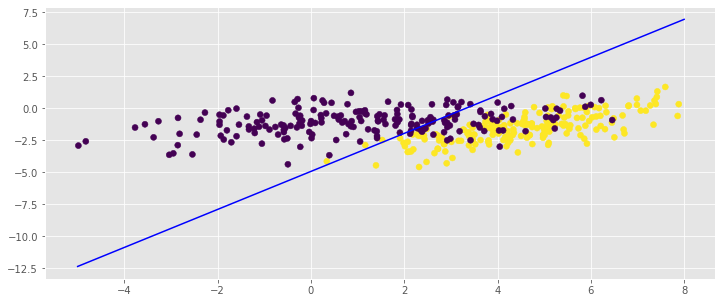

In [901]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
logclf = MySGDClassifier(batch_generator, C=100, alpha=0.01, max_epoch=100, model_type='log_reg',batch_size = 10)
plot_decision_boundary(logclf,X,y)

plt.scatter(X[:,0], X[:,1], c = y)

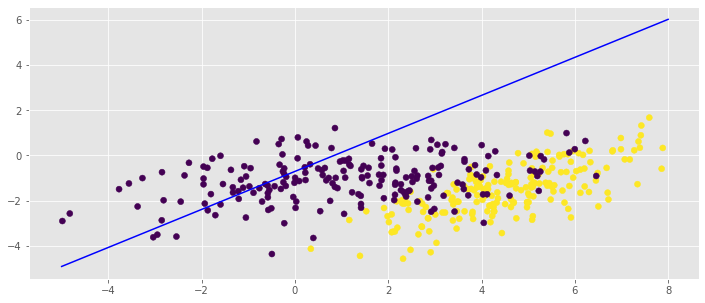

In [937]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
linclf = MySGDClassifier(batch_generator, C=100, alpha=0.01, max_epoch=100, model_type='lin_reg',batch_size = 10)
plot_decision_boundary(linclf,X,y)

plt.scatter(X[:,0], X[:,1], c = y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [938]:
from sklearn.datasets import make_classification

In [939]:
X, y = make_classification(n_samples=10000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

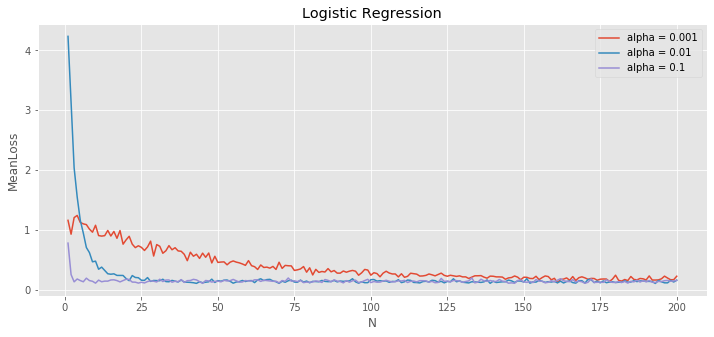

In [946]:
N = 50
alphas = [0.001,0.01,0.1]
plt.ylabel("MeanLoss")
plt.xlabel("N")
for alpha in alphas:
#     logclf.setAlpha(alpha)
    logclf = MySGDClassifier(batch_generator, C=100, alpha=alpha, max_epoch=10, model_type='log_reg',batch_size = 10)
    logclf.fit(X,y)
    meanLoss = [sum(logclf.errors_log['loss'][i * N:(i + 1) * N]) / N for i in range(len(logclf.errors_log['iter']) // N)]
    args = (range(1,len(logclf.errors_log['iter']) // N + 1))
    #|args| = 10000/50 = 200
    plt.title("Logistic Regression")
    plt.plot(args,meanLoss,label='alpha = {}'.format(alpha))
plt.legend()
plt.show()

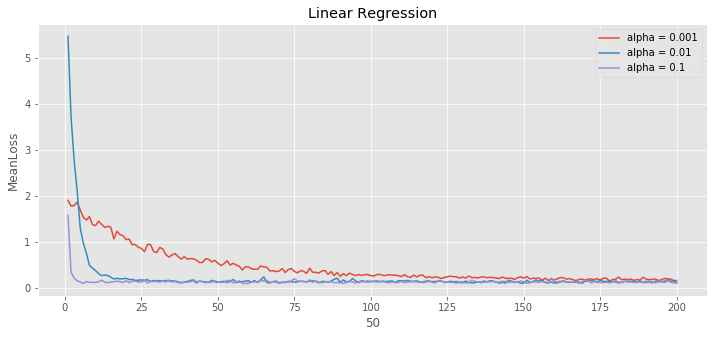

In [951]:
N = 50
alphas = [0.001,0.01,0.1]
plt.ylabel("MeanLoss")
plt.xlabel(N)
for alpha in alphas:
#     logclf.setAlpha(alpha)
    logclf = MySGDClassifier(batch_generator, C=100, alpha=alpha, max_epoch=10, model_type='log_reg',batch_size = 10)
    logclf.fit(X,y)
    meanLoss = [sum(logclf.errors_log['loss'][i * N:(i + 1) * N]) / N for i in range(len(logclf.errors_log['iter']) // N)]
    args = (range(1,len(logclf.errors_log['iter']) // N + 1))
    plt.title("Linear Regression")
    plt.plot(args,meanLoss,label='alpha = {}'.format(alpha))
plt.legend()
plt.show()

Что Вы можете сказать про сходимость метода при различных alpha? Какое значение стоит выбирать для лучшей сходимости?

* Альфа следует брать либо средним(универсально помогает), либо ориентируясь на предыдущий шагспуска.
Возможно, стокоэффицент, нормирующий alpha на текущем шаге в зависимости от предыдущего шага(чтобы быстрее ползти к минимуму)

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

[-0.31448587 -0.10826924 -1.83085268 -0.01449231  0.54697121  0.04913325
 -0.06394201  0.01172922  1.93843203 -1.64970747  0.02385541]
[-0.14388508 -0.02245389 -1.37049734 -0.00211264  0.40046222  0.01485551
 -0.00534641  0.02469147  1.58033314 -1.44268312 -0.01646917]
[-0.04017747 -0.01300805 -0.9125805   0.01255994  0.21607135  0.01869135
 -0.01068488  0.01532656  1.06947452 -1.00893121  0.004061  ]
[-0.00119767 -0.01003477 -0.56737993 -0.00132564  0.11884563  0.00474587
 -0.00296272  0.00205028  0.64851783 -0.58421328  0.00352897]
[-0.00834253 -0.00811607 -0.27532294  0.00277384  0.01003622  0.00424585
 -0.00091193  0.00914873  0.29596102 -0.28358561  0.00352914]
[-0.0029854  -0.00396312 -0.10007656 -0.00767444 -0.00954178 -0.0040175
  0.00426158  0.002067    0.09478676 -0.09882976 -0.00399151]
[ 0.00168457 -0.00336375 -0.02634822 -0.00216869 -0.00301501 -0.00323861
 -0.00702129 -0.00054758  0.01965683 -0.02378579  0.00235739]
[-6.47304441e-05 -6.58254942e-04 -5.76175575e-03  9.0698

/home/maxkile/.conda/envs/main/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log2
/home/maxkile/.conda/envs/main/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in multiply
/home/maxkile/.conda/envs/main/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/home/maxkile/.conda/envs/main/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in true_divide


[nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan]


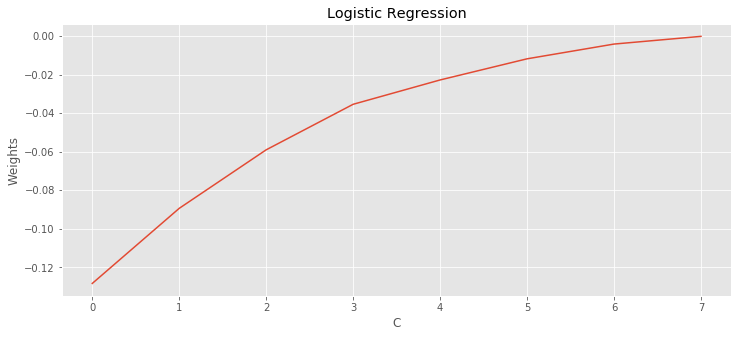

In [965]:
C = np.logspace(3,-3,10)
meanWeights = list()
logclf = MySGDClassifier(batch_generator, C=100, alpha=0.01, max_epoch=10, model_type='log_reg',batch_size = 10)
plt.ylabel("Weights")
plt.xlabel("C")
for c in C:
    logclf.setC(c)
    logclf.fit(X,y)
    print(logclf.weights)
    meanWeights.append(np.mean(logclf.weights))#X
plt.title("Logistic Regression")
plt.plot(meanWeights)
plt.show()
#чтобы избавиться от nan(деления на '0' или log(0) видимо надо где-то немного возмутить исходные данные)

/home/maxkile/.conda/envs/main/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log2
/home/maxkile/.conda/envs/main/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in multiply
/home/maxkile/.conda/envs/main/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/home/maxkile/.conda/envs/main/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in true_divide


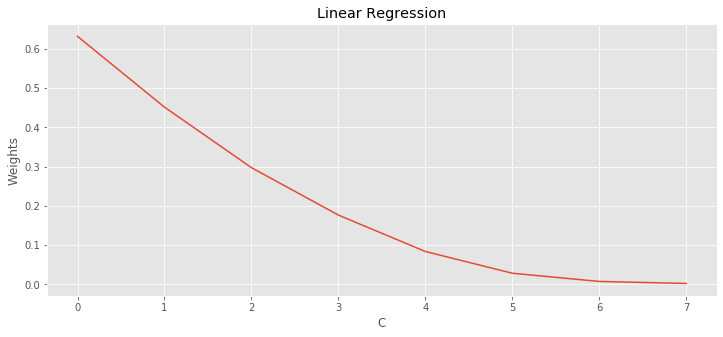

In [967]:
C = np.logspace(3,-3,10)
meanWeights = list()
logclf = MySGDClassifier(batch_generator, C=100, alpha=0.01, max_epoch=10, model_type='lin_reg',batch_size = 10)
plt.ylabel("Weights")
plt.xlabel("C")
for c in C:
    logclf.setC(c)
    logclf = MySGDClassifier(batch_generator, C=c, alpha=0.01, max_epoch=10, model_type='log_reg',batch_size = 10)
    logclf.fit(X,y)
    meanWeights.append(np.mean(np.abs(logclf.weights)))#X
plt.title("Linear Regression")
plt.plot(meanWeights)
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [4]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [5]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [6]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [10]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

Полагаю стоит дополнительно уделить внимание практической подготовке данных: удалении шумов, коррелирующих  признаков и.т.д.. Поподробнее рассказать о способах оценки модели, особенно про ROC кривую и её площадь.

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

In [ ]:
Интересно, познавательно, временами сложновато!